##  Challenge: Combining DataFrames

1. Open empty notebook and read in life_expectancy and continents datasets. Both of these datasets are available from earlier lessons. Life expectancy dataset should be a cleaned version of the original dataset (the outcome of Data Cleansing project milestones).

2. Merge the two dataframes into one using pandas.DataFrame.merge()

    Link to documentation: pandas.DataFrame.merge()

    Note: Keep in mind this will render the merged dataframe in your notebook. However in order to execute commands on the merged dataframe you must put it in a variable i.e. df_merged = df1.merge(df2)

3. Repeat steps 1 and 2 with population and total_fertility (the cleaned versions as well) until you have a single dataframe that contains the information from all four original dataframes

    Tip: the column on which the dataframes are merged on must have the same data type in both dataframes. If you have numbers in both but in one dataframe they are strings and the other integers the dataframes will not merge properly. Use .astype() to remedy this.

4. Write new dataframe to hard drive as gapminder_total.csv in this week’s data folder for use in the upcoming lessons.

In [1]:
import pandas as pd

In [14]:
import matplotlib.pyplot as plt

### Merging life_expectancy and continents dataframes

In [2]:
life_df = pd.read_csv('../../data/life_expectancy_cleaned.csv')
life_df

,country,year,life expectancy
0,Afghanistan,1951,27.13
1,Albania,1951,54.72
2,Algeria,1951,43.03
3,Angola,1951,31.05
4,Antigua and Barbuda,1951,58.26
...,...,...,...
13500,Virgin Islands (U.S.),2016,80.82
13501,Yemen,2016,64.92
13502,Zambia,2016,57.10
13503,Zimbabwe,2016,61.69


In [3]:
continent_df = pd.read_csv('../../data/continents.csv', sep =';')
continent_df

,continent,country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina
...,...,...
189,South America,Paraguay
190,South America,Peru
191,South America,Suriname
192,South America,Uruguay


In [4]:
merged_df1 = pd.merge(life_df, continent_df, how='inner', on='country')

merged_df1

,country,year,life expectancy,continent
0,Afghanistan,1951,27.13,Asia
1,Afghanistan,1952,27.67,Asia
2,Afghanistan,1953,28.19,Asia
3,Afghanistan,1954,28.73,Asia
4,Afghanistan,1955,29.27,Asia
...,...,...,...,...
11230,Marshall Islands,2012,66.20,Australia and Oceania
11231,Marshall Islands,2013,66.50,Australia and Oceania
11232,Marshall Islands,2014,66.70,Australia and Oceania
11233,Marshall Islands,2015,66.90,Australia and Oceania


### Merging population and total_fertility dataframes

In [5]:
pop_df = pd.read_csv('../../data/population_cleaned.csv')
pop_df

,country,year,population
0,Afghanistan,1951,7839426.0
1,Akrotiri and Dhekelia,1951,10737.0
2,Albania,1951,1287499.0
3,Algeria,1951,9039913.0
4,American Samoa,1951,19295.0
...,...,...,...
16480,Zambia,2015,16211767.0
16481,Zimbabwe,2015,15602751.0
16482,South Sudan,2015,12339812.0
16483,Curaçao,2015,157203.0


In [6]:
fert_rate_df = pd.read_csv('../../data/fertility_rate_cleaned.csv')
fert_rate_df

,country,year,fertility
0,Afghanistan,1951,7.67
1,Albania,1951,5.90
2,Algeria,1951,7.65
3,Angola,1951,6.94
4,Antigua and Barbuda,1951,4.46
...,...,...,...
13056,Vietnam,2015,1.70
13057,Virgin Islands (U.S.),2015,2.45
13058,Yemen,2015,3.83
13059,Zambia,2015,5.59


In [9]:
merged_df2 = pd.merge(pop_df, fert_rate_df, how='inner', on= ['year','country'])

merged_df2

,country,year,population,fertility
0,Afghanistan,1951,7839426.0,7.67
1,Albania,1951,1287499.0,5.90
2,Algeria,1951,9039913.0,7.65
3,Angola,1951,4439705.0,6.94
4,Antigua and Barbuda,1951,48306.0,4.46
...,...,...,...,...
13054,Vietnam,2015,93447601.0,1.70
13055,Virgin Islands (U.S.),2015,106291.0,2.45
13056,Yemen,2015,26832215.0,3.83
13057,Zambia,2015,16211767.0,5.59


In [10]:
final_merged_df = pd.merge(merged_df1,merged_df2)
final_merged_df

,country,year,life expectancy,continent,population,fertility
0,Afghanistan,1951,27.13,Asia,7839426.0,7.67
1,Afghanistan,1952,27.67,Asia,7934798.0,7.67
2,Afghanistan,1953,28.19,Asia,8038312.0,7.67
3,Afghanistan,1954,28.73,Asia,8150037.0,7.67
4,Afghanistan,1955,29.27,Asia,8270024.0,7.67
...,...,...,...,...,...,...
10915,Zimbabwe,2011,51.60,Africa,14255592.0,3.64
10916,Zimbabwe,2012,54.20,Africa,14565482.0,3.56
10917,Zimbabwe,2013,55.70,Africa,14898092.0,3.49
10918,Zimbabwe,2014,57.00,Africa,15245855.0,3.41


In [11]:
# save the file as csv 
final_merged_df.to_csv('../../data/gapminder_total.csv', index=False)

In [37]:
##plotting
df_subset = final_merged_df[ (final_merged_df['year'] >= 1992) & (final_merged_df['country'] == 'Pakistan')]
# df_subset = final_merged_df[ (final_merged_df['country'] == 'Pakistan')]

Text(0.5, 1.0, 'Life Expectancy vs Fertility Rate from 1992 to 2015')

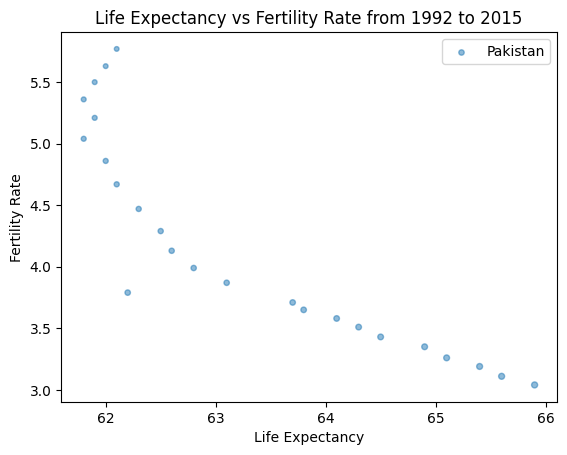

In [39]:
plt.scatter(x=df_subset['life expectancy'],
           y= df_subset['fertility'],
           s=df_subset['population'] / 10000000, alpha=0.5,
           label='Pakistan')
plt.xlabel('Life Expectancy')
plt.ylabel('Fertility Rate')
plt.legend()
plt.title('Life Expectancy vs Fertility Rate from 1992 to 2015')

In [40]:
df_subset_2 = final_merged_df[ (final_merged_df['year'] >= 1992) & (final_merged_df['country'] == 'China')]

Text(0.5, 1.0, 'Life Expectancy vs Fertility Rate from 1992 to 2015')

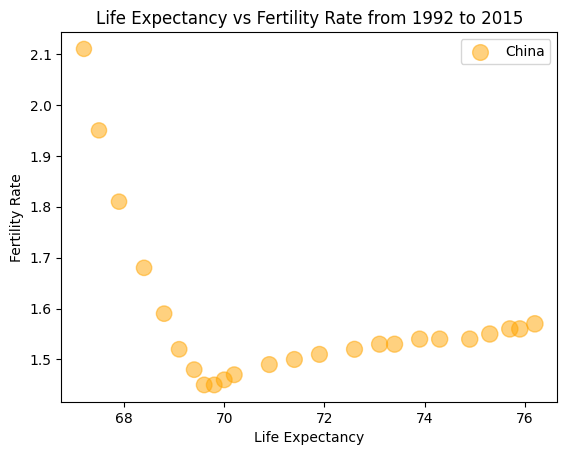

In [41]:
plt.scatter(x=df_subset_2['life expectancy'],
           y= df_subset_2['fertility'],
           s=df_subset_2['population'] / 10000000, alpha=0.5,
           label='China',
           c='orange')
plt.xlabel('Life Expectancy')
plt.ylabel('Fertility Rate')
plt.legend()
plt.title('Life Expectancy vs Fertility Rate from 1992 to 2015')

Text(0.5, 1.0, 'Life Expectancy vs Fertility Rate from 1992 to 2015')

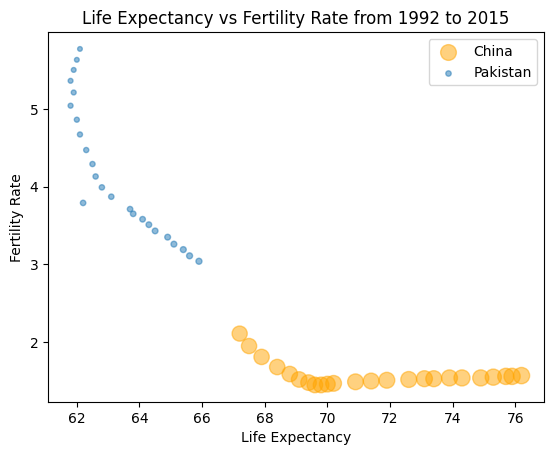

In [49]:
#comaparing china and pakistan
plt.scatter(x=df_subset_2['life expectancy'],
           y= df_subset_2['fertility'],
           s=df_subset_2['population'] / 10000000, alpha=0.5,
           label='China',
           c='orange')


plt.scatter(x=df_subset['life expectancy'],
           y= df_subset['fertility'],
           s=df_subset['population'] / 10000000, alpha=0.5,
           label='Pakistan')
plt.xlabel('Life Expectancy')
plt.ylabel('Fertility Rate')
plt.legend()
plt.title('Life Expectancy vs Fertility Rate from 1992 to 2015')